In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chem 277B : HW6 - Clustering #

## 1. KMeans ##

We will now examine unsupervised learning for classification for the data set of chemical
compounds. In the compounds.csv, 150 organic compounds which belong to 3 different types (phenol, ether
and amide) were tested upon with 4 different testing reagents (denoted reagents A-D). We would like to
cluster data points by unsupervised learning, where we would not use the true label to guide classification
such as using a cost function, instead we directly learn from the given features themselves.

## (a) ##

Read in 'compounds.csv'

In [2]:
compounds = pd.read_csv('../Datasets/compounds.csv')
compounds

,A,B,C,D,type
0,6.4,2.9,4.3,1.3,amide
1,5.7,4.4,1.5,0.4,phenol
2,6.7,3.0,5.2,2.3,ether
3,5.8,2.8,5.1,2.4,ether
4,6.4,3.2,5.3,2.3,ether
...,...,...,...,...,...
145,5.4,3.9,1.3,0.4,phenol
146,6.3,2.5,5.0,1.9,ether
147,6.0,3.4,4.5,1.6,amide
148,6.2,2.9,4.3,1.3,amide


Rescale the features to a value between 0 and 1 by dividing the max of that feature. 

In [3]:
compound_features = compounds.drop(['type'], axis=1)
compound_features = compound_features/compound_features.max()
compound_type = compounds['type']

Visualize the data and comment on which features are correlated.

Plot of true compound types:

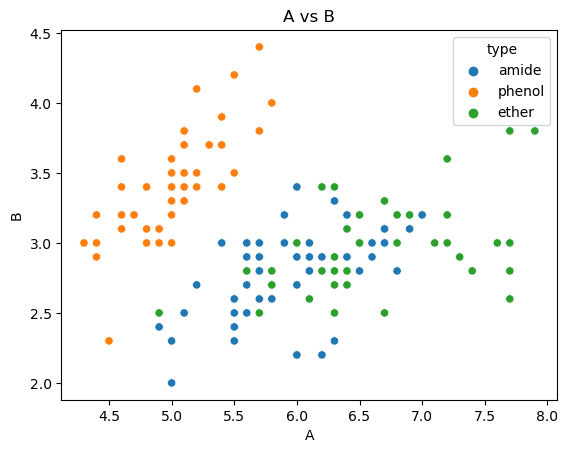

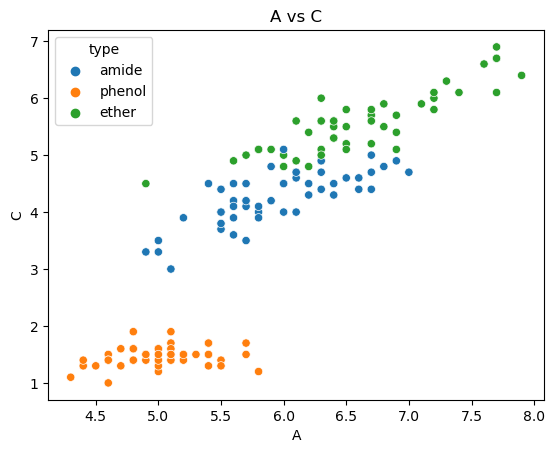

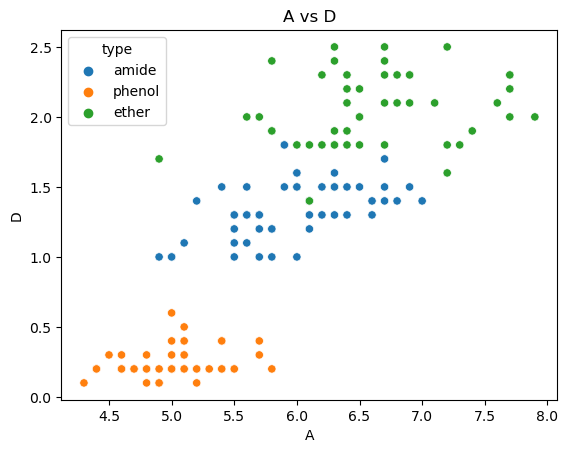

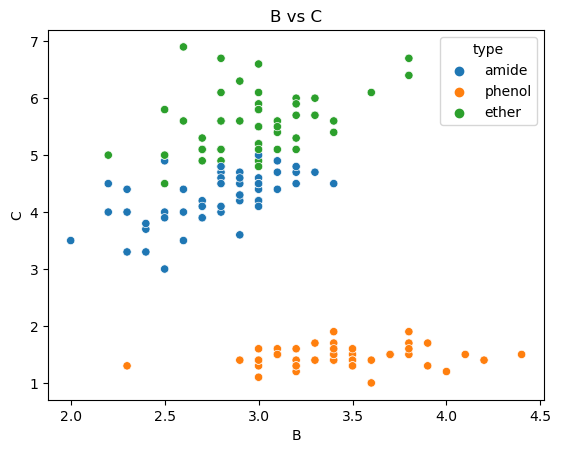

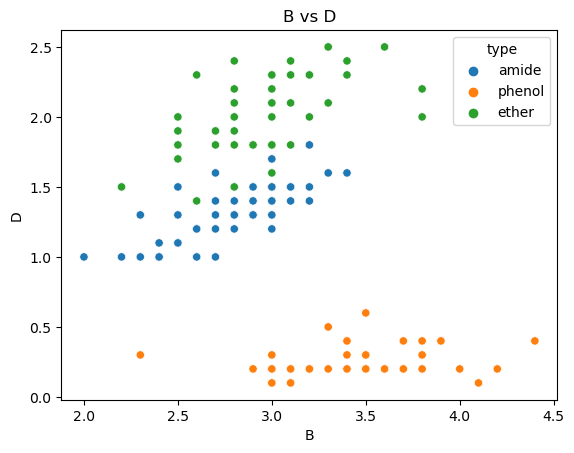

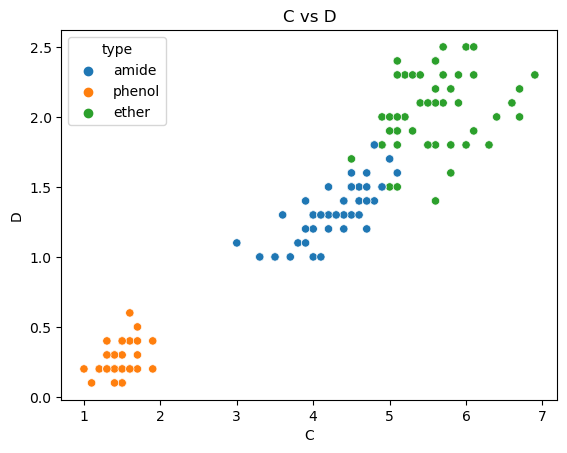

In [4]:
# Visualize the data using seaborn to see which features are correlated
sns.scatterplot(x='A', y='B', hue=compound_type, data=compounds)
# label the axes
plt.xlabel('A')
plt.ylabel('B')
plt.title('A vs B')
plt.show()

sns.scatterplot(x='A', y='C', hue=compound_type, data=compounds)
plt.xlabel('A')
plt.ylabel('C')
plt.title('A vs C')
plt.show()

sns.scatterplot(x='A', y='D', hue=compound_type, data=compounds)
plt.xlabel('A')
plt.ylabel('D')
plt.title('A vs D')
plt.show()

sns.scatterplot(x='B', y='C', hue=compound_type, data=compounds)
plt.xlabel('B')
plt.ylabel('C')
plt.title('B vs C')
plt.show()

sns.scatterplot(x='B', y='D', hue=compound_type, data=compounds)
plt.xlabel('B')
plt.ylabel('D')
plt.title('B vs D')
plt.show()

sns.scatterplot(x='C', y='D', hue=compound_type, data=compounds)
plt.xlabel('C')
plt.ylabel('D')
plt.title('C vs D')
plt.show()

Plotting correlation matrix:

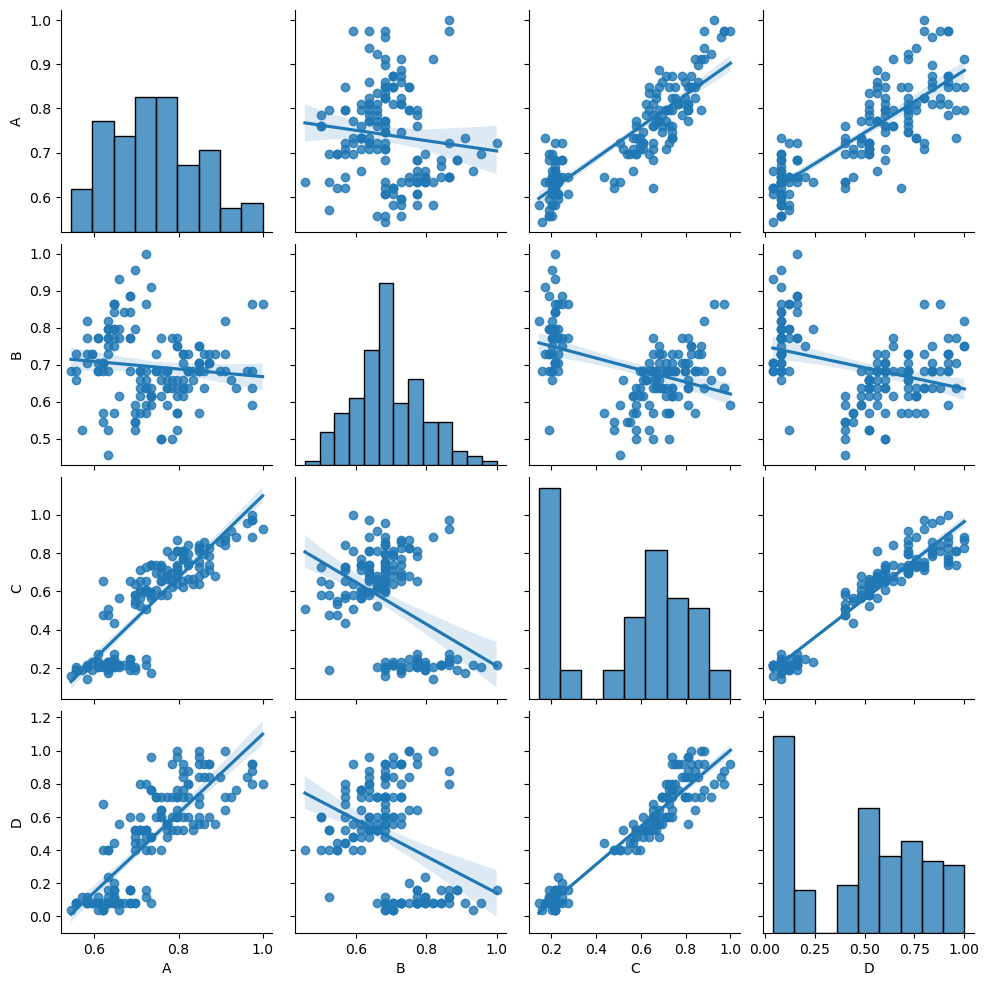

In [5]:
sns.pairplot(compound_features, kind='reg')

From the correlation matrix above, it appears as though features A, C, and D are correlated looking at the linear relationship with A&C, A&D, and C&D. 

Plotting heatmap:

<AxesSubplot:>

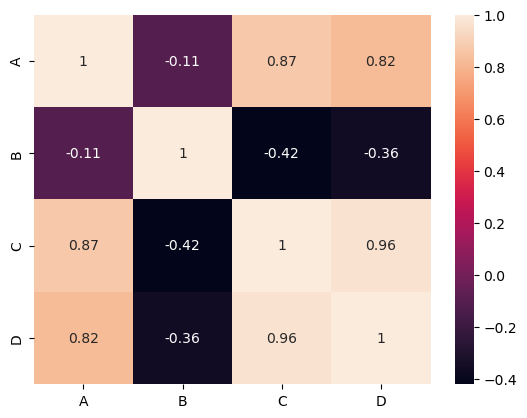

In [6]:
sns.heatmap(compound_features.corr(), annot=True)

The heatmap above also shows that there is a correlation between A, C, and D, whereas B does not have high correlation with any of the other features.

## (b) ##

KMeans Clustering

In [7]:
import warnings

class KMeans():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros_like(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        if len(np.unique(new_assignments))<self.K:
            return self.cluster(input_points)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            for i in range(self.K):
                centroids[i] = np.mean(input_points[new_assignments==i], axis=0)
            assignments = new_assignments
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)
        x = np.sum(data_points**2, axis=1).reshape(-1,1)
        y = np.sum(centroids**2, axis=1)
        distances = np.sqrt(x + y - 2*np.dot(data_points, centroids.T))
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments
    

### K=2 Clusters: A and C ###

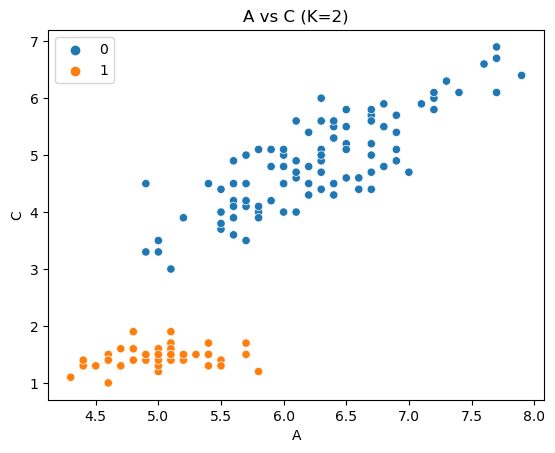

In [8]:
Kmeans_2 = KMeans(K=2)
assignments_2 = Kmeans_2.cluster(compound_features.values)

# Visualize the clustering results
sns.scatterplot(x='A', y='C', hue=assignments_2, data=compounds)
plt.xlabel('A')
plt.ylabel('C')
plt.title('A vs C (K=2)')
plt.show()

### K=3 Clusters: A and C ###

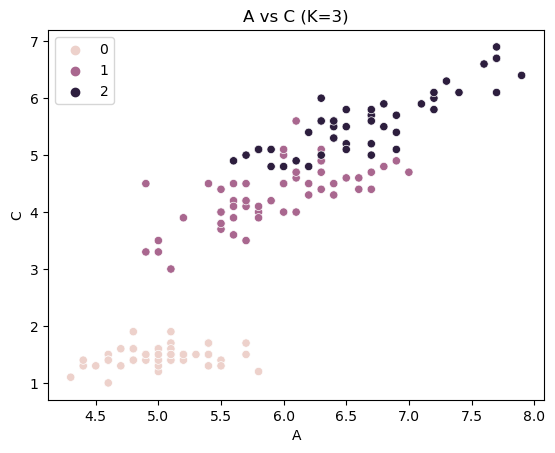

In [9]:
Kmeans_3 = KMeans(K=3)
assignments_3 = Kmeans_3.cluster(compound_features.values)

# Visualize the clustering results
sns.scatterplot(x='A', y='C', hue=assignments_3, data=compounds)
plt.xlabel('A')
plt.ylabel('C')
plt.title('A vs C (K=3)')
plt.show()

### K=4 Clusters: A and C ###

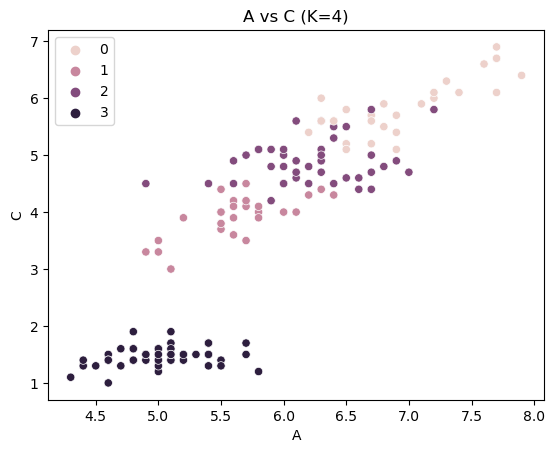

In [10]:
Kmeans_4 = KMeans(K=4)
assignments_4 = Kmeans_4.cluster(compound_features.values)

# Visualize the clustering results
sns.scatterplot(x='A', y='C', hue=assignments_4, data=compounds)
plt.xlabel('A')
plt.ylabel('C')
plt.title('A vs C (K=4)')
plt.show()

A K value of 3 make the most sense according to the visualizations. The lower left cluster should be its own cluster, which is true when K is 2 and 3. However, when K is 4, the model tries to divide the lower left cluster into 2 separate clusters which does not quite seem right. While K is 2 also looks reasonable, the upper right cluster is quite large and could be divided into two, as K=3 does. 

## (c) ##

**For K=3 clustering result, compare it to the true data label. How good is the classification?**

In [11]:
def validate(y_hat,y):
    """print accuracy of prediction for each class for the compounds dataset
    yhat: np.array shape(ndata). Your prediction of classes
    y: np.array of str shape(ndata). data labels / groudn truths.
    """
    # correct classification
    compounds = np.unique(y) # should be ['amide','phenol','ether'] for compounds dataset
    clusters =[np.where((y==c)) for c in compounds]
    pred_class = np.unique(y_hat)
    
    #remove -1 for noise point in DBSCAN
    pred_class= np.delete(pred_class,np.where(pred_class==-1))
    assert len(pred_class) == len(compounds), f'y_hat has less or more than {len(compounds)} classes:{pred_class}'

    for i in range(3):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= np.where((y_hat==pred_class[i]))
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out \
of {np.count_nonzero(clusters[idx])} are classified correctly')

In [12]:
validate(assignments_3, compound_type)

Class 0 - phenol: 50 out of 50 are classified correctly
Class 1 - amide: 48 out of 49 are classified correctly
Class 2 - ether: 46 out of 50 are classified correctly


The classification is not bad! Out of all 150 compounds, only 5 were classified incorrectly. That means KMeans was able to classify 96.7% of compounds correctly. Although it's not perfect, it did a pretty decent job.

## (d) ##

**Comment out the part of the code that reinitialize the centroid if the initial assignment is not
good. Run the KMeans algorithm multiple times with K=4, what problem do you see? Comment on how
the choice of initial centroids might affect the results and what are the possible solutions.**

In [13]:
import warnings

class KMeans_D():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros_like(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
#         if len(np.unique(new_assignments))<self.K:
#             return self.cluster(input_points)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            for i in range(self.K):
                centroids[i] = np.mean(input_points[new_assignments==i], axis=0)
            assignments = new_assignments
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)
        x = np.sum(data_points**2, axis=1).reshape(-1,1)
        y = np.sum(centroids**2, axis=1)
        distances = np.sqrt(x + y - 2*np.dot(data_points, centroids.T))
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments
    

/Users/joshua/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/joshua/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/var/folders/xf/ys07020s0656mhx3qrl86vfh0000gn/T/ipykernel_2040/1385520681.py:33: UserWarning: At least one centroid vanishes
  warnings.warn('At least one centroid vanishes')


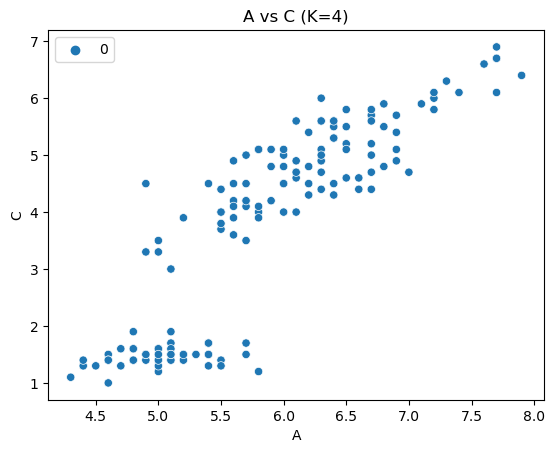

In [14]:
edited_KMeans_4 = KMeans_D(K=4)

assignments_d = edited_KMeans_4.cluster(compound_features.values)

sns.scatterplot(x='A', y='C', hue=assignments_d, data=compounds)
plt.xlabel('A')
plt.ylabel('C')
plt.title('A vs C (K=4)')
plt.show()

The majority of the time the code block above is run, it produces an error stating that the maximum iterations has been reached and at least one of the centroid has vanished. This is because sometimes the initial assignments created using the randomized centroids only have 3 or less unique values when there should be 4 because we want 4 clusters. The choice of initial centroids could result in unevenly classifying data points so that one or more clusters is not assigned any data points. When this happens, one centroid vanishes and so the function is unable to finish dividing the data into all the clusters.

## 2. DBSCAN ##

## (a) ##

**Use DBSCAN to classify compounds dataset. Adjust the Rcut and MinPts hyperparameters so that
we have 3 clusters. How many core, border and noise points do you have respectively? Compared to
KMeans, is DBSCAN more effective?**

In [15]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
clustering = DBSCAN(eps=0.15, min_samples=10).fit(compound_features.values)
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
clustering.labels_
# Indices of core samples
clustering.core_sample_indices_

array([  0,   2,   4,   5,   7,   8,   9,  10,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  31,
        32,  33,  35,  36,  37,  38,  39,  40,  41,  43,  44,  45,  46,
        47,  48,  51,  52,  54,  55,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  81,  82,  84,  85,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121,
       122, 123, 126, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])

In [16]:
def count_points(labels):
    core = 0
    border = 0
    noise = 0
    for i in range(len(labels)):
        if labels[i] == -1:
            noise += 1
        elif i in clustering.core_sample_indices_:
            core += 1
        else:
            border += 1
    
    print('core points: ', core)
    print('border points: ', border)
    print('noise points: ', noise)
    
count_points(clustering.labels_)

core points:  128
border points:  17
noise points:  5


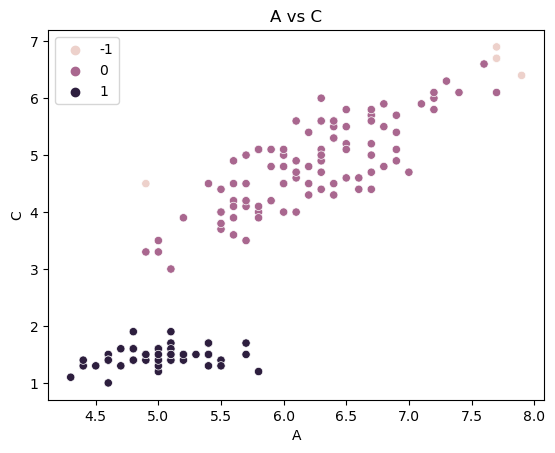

In [17]:
# Visualize the clustering results
sns.scatterplot(x='A', y='C', hue=clustering.labels_, data=compounds)
plt.xlabel('A')
plt.ylabel('C')
plt.title('A vs C')
plt.show()

While DBSCAN is able to cluster data points quite well, in this case, it groups together the upper right data points as one big cluster when we know that there are actually 3 types of compounds rather than 2. Therefore, it seems easier to assign a specific desired amount of clusters to KMeans compared to DBSCAN. In this case, the predicted types of KMeans are more effective than DBSCAN.

## (b) ##

**Let’s work on the noisy moon dataset (provided in the reference code) instead. Try using DBSCAN
and one of KMeans with K=2. Visualize the clustering result. This time which method works better?**

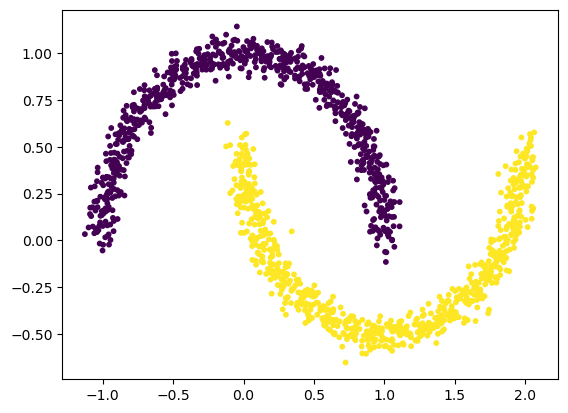

In [18]:
# Noisy moon dataset
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pylab import *

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
# print(noisy_moons)
X,y=noisy_moons
plt.scatter(X[:, 0], X[:, 1], s=10,c=y)

core points:  128
border points:  1372
noise points:  0


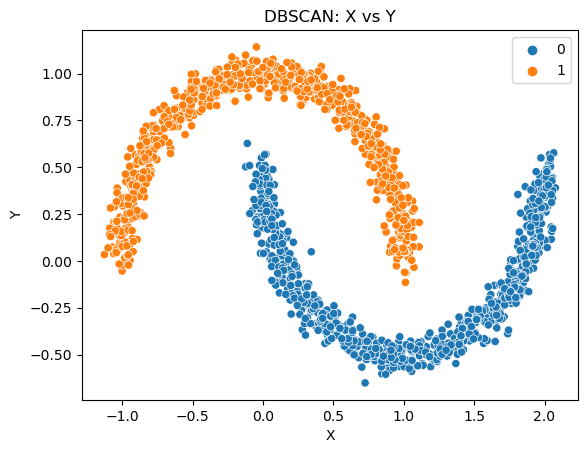

In [19]:
db_moon = DBSCAN(eps=0.2, min_samples=10).fit(X)
count_points(db_moon.labels_)

# visualize the clustering results
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=db_moon.labels_)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN: X vs Y')
plt.show()

### KMeans ###

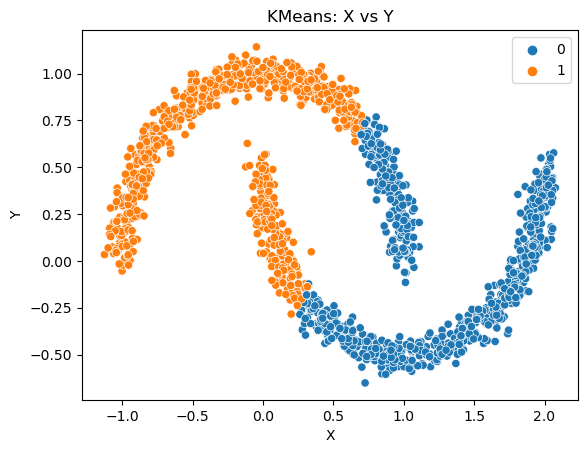

In [20]:
Kmeans_cluster = KMeans(K=2)
kmeans_moon = Kmeans_cluster.cluster(X)

# visualize the clustering results
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_moon)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KMeans: X vs Y')
plt.show()

This time, DBSCAN is much better. Because KMeans depends on data points distance to the centroid, it grouped the data points together in terms of proximity to a center point but ended up splitting the moons in half. On the other hand, DBSCAN was able to to correctly assign the data points into the two separate moons because its algorithm takes into account the proximity of other data points to each other rather than just a center data point.